# Лабораторная работа 5. Эвристические алгоритмы

## Задание 1

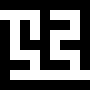

In [9]:
from IPython.display import Image
Image(filename='Downloads/lab_05_17.png')

#### а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.



In [10]:
по принципу волнового алгоритма:

#########
S1  #   #
# # ### #
# # #   #
# ### ###
#   #   #
### ### #
#       E
#########

#########
S12 #   #
#2# ### #
# # #   #
# ### ###
#   #   #
### ### #
#       E
#########

#########
S123#   #
#2# ### #
#3# #   #
# ### ###
#   #   #
### ### #
#       E
#########

#########
S123#   #
#2#4### #
#3# #   #
#4### ###
#   #   #
### ### #
#       E
#########

и так далее, конечный вид будет такой:
    
#########
S123#   #
#2#4### #
#3#5#   #
#4### ###
#567#   #
###8### #
#1090123E
#########

так мы дошли до конца (E) за 13 шагов это будет наикратчайший путь

SyntaxError: invalid syntax (6961691.py, line 1)

#### б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.

In [12]:
маршрутный алгоритм работает следующим образом:
    вокруг старта рассматривается область из 8 клеток, и в какой расстояние до финиша будет ближе, туда и идем
    таким образом с единицы можно пойти в двух направлениях и после того, как алгоритм поймет, что верхний путь не ведет то финиша
    он пойдет по нижнему
    далее дойдя до 8 алгоритм поймет, что 10 вправую сторону (на примере обозначен цифрой 0) ближе 10 влевую и пойдет направо
    и дойдя до 13 он придет к финишу
#########
S123#   #
#2#4### #
#3#5#   #
#4### ###
#567#   #
###8### #
#1090123E
#########

SyntaxError: invalid syntax (1516850567.py, line 1)

## Задание 2.

#### Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. Реализовать волновой алгоритм

### исходный лабиринт

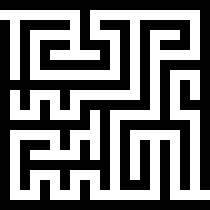

In [13]:
from IPython.display import Image
Image(filename='Downloads/lab_05_17(2).png')

In [14]:
import sys
from collections import deque

def find_shortest_path(maze, start, end):
    rows = len(maze)
    cols = len(maze[0])

    # Создаем массив с расстояниями от старта до каждой ячейки
    distance = [[sys.maxsize] * cols for _ in range(rows)]
    distance[start[0]][start[1]] = 0

    # Создаем очередь для обхода ячеек волновым алгоритмом
    queue = deque([start])

    # Волновой алгоритм
    while queue:
        row, col = queue.popleft()

        # Проверяем соседние ячейки
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_row, new_col = row + dx, col + dy

            # Проверяем границы лабиринта и доступность ячейки
            if 0 <= new_row < rows and 0 <= new_col < cols and maze[new_row][new_col] == 0:
                # Проверяем, если новое расстояние меньше текущего, обновляем его и добавляем ячейку в очередь
                if distance[new_row][new_col] == sys.maxsize:
                    distance[new_row][new_col] = distance[row][col] + 1
                    queue.append((new_row, new_col))

    # Проверяем, достигли ли мы выхода
    if distance[end[0]][end[1]] == sys.maxsize:
        return None  # Выход недостижим

    # Восстанавливаем путь от выхода до входа
    path = []
    row, col = end
    while (row, col) != start:
        path.append((row, col))
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            prev_row, prev_col = row + dx, col + dy
            if 0 <= prev_row < rows and 0 <= prev_col < cols and distance[prev_row][prev_col] == distance[row][col] - 1:
                row, col = prev_row, prev_col
                break

    # Добавляем вход в начало пути
    path.append(start)

    return path[::-1]  # Инвертируем путь

def display_maze(maze):
    for row in maze:
        for cell in row:
            if cell == 1:
                print('#', end=' ')
            elif cell == 0:
                print(' ', end=' ')
            elif cell == 'S':
                print('S', end=' ')
            elif cell == 'E':
                print('E', end=' ')
            elif cell == '*':
                print('*', end=' ')
        print()

def display_path(maze, path):
    maze_copy = [row[:] for row in maze]  # Создаем копию лабиринта
    start, end = path[0], path[-1]
    maze_copy[start[0]][start[1]] = 'S'
    maze_copy[end[0]][end[1]] = 'E'

    # Проходимся по оптимальному пути и отмечаем его на копии лабиринта
    for row, col in path[1:-1]:
        maze_copy[row][col] = '*'

    print("Original Maze:")
    display_maze(maze)
    print("\nMaze with Optimal Path:")
    display_maze(maze_copy)
# Лабиринт
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

start = (1, 0)
end = (19, 20)

# Находим оптимальный путь через лабиринт
path = find_shortest_path(maze, start, end)

# Отображаем лабиринт с оптимальным путем
display_path(maze, path)




Original Maze:
# # # # # # # # # # # # # # # # # # # # # 
                #                       # 
#   # # # # #   #   # # #   # # # # #   # 
#   #           #       #   #       #   # 
#   #   # # #   # # #   #   #   # # #   # 
#   #   #           #   #   #           # 
#   #   # # # # # # #   #   #   # # # # # 
#   #                   #   #   #       # 
# # # # # # # # # # # # #   #   #   #   # 
#   #       #               #   #   #   # 
#   #   #   #   # # # # # # #   #   # # # 
#       #       #   #           #       # 
# # # # # # # # #   #   # # # # # # #   # 
#           #       #   #           #   # 
#   # # #   #   #   #   #   #   #   #   # 
#   #           #   #   #   #   #   #   # 
#   # # # # # # # # #   #   #   #   #   # 
#   #       #       #   #   #   #   #   # 
#   #   #   #   #   #   # # #   #   #   # 
#       #       #               #         
# # # # # # # # # # # # # # # # # # # # # 

Maze with Optimal Path:
# # # # # # # # # # # # # # # # # # # # # 
S * * * * * * 